In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final_cleaned_data.csv')

In [4]:
df

,Unnamed: 0,listedAt,daysOnMarket,availableFrom,street,price,borough,neighborhood,zip,propertyType,...,Hispanic or Latino_ratio,Population Below Poverty Level_ratio,Employed_ratio,Unemployed_ratio,High School Graduate (Age 25+)_ratio,Bachelor’s Degree (Age 25+)_ratio,Graduate or Professional Degree (Age 25+)_ratio,Never Married_ratio,Currently Married_ratio,Divorced_ratio
0,0,2024-11-25,1.0,2024-11-25,171 East 96th Street #4A,1855.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
1,1,2024-11-22,4.0,2024-11-22,93 East 96th Street #11,2235.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
2,2,2024-11-22,4.0,2024-11-22,501 Saratoga Avenue #B,1750.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
3,3,2024-11-20,6.0,2024-11-20,1115 Willmohr Street #2P,1850.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
4,4,2024-11-19,7.0,2024-11-19,1075 Clarkson Avenue #2B,3000.0,Brooklyn,brownsville,11212,rental,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,7837,NaN,9.0,2024-11-14 00:00:00,12-1 26th Ave #2,4400.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7838,7838,NaN,NaN,2024-11-15 00:00:00,12-20 Astoria Blvd #2A,3500.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7839,7839,NaN,5.0,2024-11-18 00:00:00,11 Maiden Ln APT 6B,3750.0,Manhattan,NaN,10038,apartment,...,0.111040,0.195433,0.538791,0.028702,0.060532,0.279527,0.011095,0.239472,0.145440,0.017179
7840,7840,NaN,NaN,NaN,88 Fulton St #TOWNHOUSE 1,3200.0,Manhattan,NaN,10038,apartment,...,0.111040,0.195433,0.538791,0.028702,0.060532,0.279527,0.011095,0.239472,0.145440,0.017179


In [14]:
len(df.columns)

50

In [15]:
df.columns

Index(['Unnamed: 0', 'listedAt', 'daysOnMarket', 'availableFrom', 'street',
       'price', 'borough', 'neighborhood', 'zip', 'propertyType', 'beds',
       'baths', 'latitude', 'longitude', 'amenities', 'builtIn', 'description',
       'hasVideo', 'PhotosNum', 'Number of Households',
       'Median Household Income', 'Per Capita Income',
       'Total Income Distribution', 'Median Gross Rent', 'Median Home Value',
       'Occupied Housing Units', 'Vacant Housing Units',
       'Owner-Occupied Units (value < $100,000)', 'Monthly Housing Costs',
       'Precinct', 'schools_in_precinct', 'nearby_subway_stations',
       'crime_rate', 'precinct_safety_rank', 'Median Age_ratio',
       'Male Population_ratio', 'Female Population_ratio', 'White Alone_ratio',
       'Black or African American Alone_ratio', 'Asian Alone_ratio',
       'Hispanic or Latino_ratio', 'Population Below Poverty Level_ratio',
       'Employed_ratio', 'Unemployed_ratio',
       'High School Graduate (Age 25+)_ratio',


In [20]:
df['Precinct'].value_counts()

Precinct
19     342
114    330
17     271
9      257
83     249
      ... 
113     27
105     17
41      16
102     11
106      3
Name: count, Length: 74, dtype: int64

In [20]:
df['daysOnMarket'].max()//365

2.0

We have 2 years of data latest data : 26th Nov 2024

In [22]:
df['price'].value_counts()

price
3000.0    242
3500.0    225
3200.0    177
2800.0    173
2500.0    149
         ... 
3305.0      1
2948.0      1
2951.0      1
2997.0      1
1625.0      1
Name: count, Length: 1007, dtype: int64

## Check for missing value

In [38]:
missing_count_per_column = df.isna().sum()
print(missing_count_per_column)

Unnamed: 0                                            0
listedAt                                           5052
daysOnMarket                                       1239
availableFrom                                      1463
street                                                0
price                                                 0
borough                                               0
neighborhood                                       5052
zip                                                   0
propertyType                                          0
beds                                                  0
baths                                                 0
latitude                                              0
longitude                                             0
amenities                                          5052
builtIn                                            5052
description                                        5052
hasVideo                                        

In [5]:
housing_data = df

In [6]:
# List of columns to check for missing values
columns_na_values = [
    "Number of Households",
    "Median Household Income",
    "Per Capita Income",
    "Total Income Distribution",
    "Median Gross Rent",
    "Median Home Value",
    "Occupied Housing Units",
    "Vacant Housing Units",
    "Owner-Occupied Units (value < $100,000)",
    "Monthly Housing Costs",
    "Median Age_ratio",
    "Male Population_ratio",
    "Female Population_ratio",
    "White Alone_ratio",
    "Black or African American Alone_ratio",
    "Asian Alone_ratio",
    "Hispanic or Latino_ratio",
    "Population Below Poverty Level_ratio",
    "Employed_ratio",
    "Unemployed_ratio",
    "High School Graduate (Age 25+)_ratio",
    "Bachelor’s Degree (Age 25+)_ratio",
    "Graduate or Professional Degree (Age 25+)_ratio",
    "Never Married_ratio",
    "Currently Married_ratio",
    "Divorced_ratio"
]

# Create a new DataFrame containing only rows with missing values in the specified columns
rows_with_na = housing_data[housing_data[columns_na_values].isna().any(axis=1)]

# Display the resulting DataFrame
rows_with_na


,Unnamed: 0,listedAt,daysOnMarket,availableFrom,street,price,borough,neighborhood,zip,propertyType,...,Hispanic or Latino_ratio,Population Below Poverty Level_ratio,Employed_ratio,Unemployed_ratio,High School Graduate (Age 25+)_ratio,Bachelor’s Degree (Age 25+)_ratio,Graduate or Professional Degree (Age 25+)_ratio,Never Married_ratio,Currently Married_ratio,Divorced_ratio
48,48,2024-11-26,0.0,2024-12-01,26-02 24th Avenue #1,3500.0,Queens,ditmars-steinway,11102,rental,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,49,2024-11-26,0.0,2024-11-26,24-37 32nd Street #1,2399.0,Queens,ditmars-steinway,11102,house,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,50,2024-11-26,0.0,2024-11-26,21-81 38th Street #9,2750.0,Queens,ditmars-steinway,11105,condo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,51,2024-11-25,1.0,2024-12-01,21-15 43rd Street #2,2500.0,Queens,ditmars-steinway,11105,rental,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,52,2024-11-25,1.0,2024-12-01,21-08 21 Road #1R,2500.0,Queens,ditmars-steinway,11105,rental,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834,7834,NaN,6.0,2024-11-18 00:00:00,26-02 4th St #6G,2600.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7835,7835,NaN,4.0,2024-11-20 00:00:00,25-33 23rd St #DT3,2500.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7836,7836,NaN,7.0,2024-11-17 00:00:00,25-40 22nd St #2AL,3000.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7837,7837,NaN,9.0,2024-11-14 00:00:00,12-1 26th Ave #2,4400.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Select columns where not all values are NaN in the `rows_with_na` DataFrame
columns_with_some_values = rows_with_na.columns[rows_with_na.notnull().any(axis=0)]

# Display the columns
# print(columns_with_some_values.tolist())

rows_with_na[columns_with_some_values]

,Unnamed: 0,listedAt,daysOnMarket,availableFrom,street,price,borough,neighborhood,zip,propertyType,...,Occupied Housing Units,Vacant Housing Units,"Owner-Occupied Units (value < $100,000)",Monthly Housing Costs,Precinct,schools_in_precinct,nearby_subway_stations,crime_rate,precinct_safety_rank,Median Age_ratio
48,48,2024-11-26,0.0,2024-12-01,26-02 24th Avenue #1,3500.0,Queens,ditmars-steinway,11102,rental,...,NaN,NaN,NaN,NaN,114,37,3,1.851653,63,NaN
49,49,2024-11-26,0.0,2024-11-26,24-37 32nd Street #1,2399.0,Queens,ditmars-steinway,11102,house,...,NaN,NaN,NaN,NaN,114,37,3,1.851653,63,NaN
50,50,2024-11-26,0.0,2024-11-26,21-81 38th Street #9,2750.0,Queens,ditmars-steinway,11105,condo,...,NaN,NaN,NaN,NaN,114,37,0,1.851653,63,NaN
51,51,2024-11-25,1.0,2024-12-01,21-15 43rd Street #2,2500.0,Queens,ditmars-steinway,11105,rental,...,NaN,NaN,NaN,NaN,114,37,0,1.851653,63,NaN
52,52,2024-11-25,1.0,2024-12-01,21-08 21 Road #1R,2500.0,Queens,ditmars-steinway,11105,rental,...,NaN,NaN,NaN,NaN,114,37,0,1.851653,63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834,7834,NaN,6.0,2024-11-18 00:00:00,26-02 4th St #6G,2600.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,114,37,0,1.851653,63,NaN
7835,7835,NaN,4.0,2024-11-20 00:00:00,25-33 23rd St #DT3,2500.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,114,37,0,1.851653,63,NaN
7836,7836,NaN,7.0,2024-11-17 00:00:00,25-40 22nd St #2AL,3000.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,114,37,0,1.851653,63,NaN
7837,7837,NaN,9.0,2024-11-14 00:00:00,12-1 26th Ave #2,4400.0,Queens,NaN,11102,apartment,...,NaN,NaN,NaN,NaN,114,37,0,1.851653,63,NaN


Lets talk about amenities

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Initialize a map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add markers for rows with amenities (non-empty)
marker_cluster_with = MarkerCluster(name='With Amenities').add_to(nyc_map)
for _, row in housing_data[housing_data['amenities'].notnull()].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='green'),
        popup=f"Amenities: {row['amenities']}"
    ).add_to(marker_cluster_with)

# Add markers for rows without amenities (empty)
marker_cluster_without = MarkerCluster(name='Without Amenities').add_to(nyc_map)
for _, row in housing_data[housing_data['amenities'].isnull()].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='red'),
        popup="No amenities"
    ).add_to(marker_cluster_without)

# Add layer control to toggle between the two layers
folium.LayerControl().add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save('nyc_amenities_map.html')

print("Map has been saved as 'nyc_amenities_map.html'. Open this file in a web browser to view the map.")

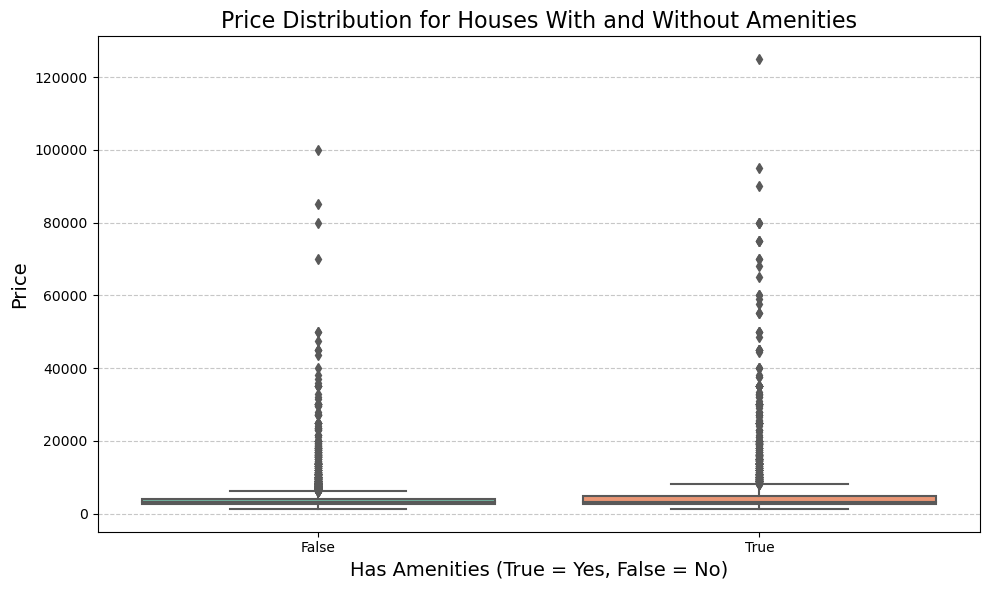

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new column to indicate if 'amenities' is NaN or not
housing_data['has_amenities'] = housing_data['amenities'].notnull()

# Plot the relationship using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_data, x='has_amenities', y='price', palette='Set2')

# Customize the plot
plt.title('Price Distribution for Houses With and Without Amenities', fontsize=16)
plt.xlabel('Has Amenities (True = Yes, False = No)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [61]:
df['neighborhood'].value_counts()

neighborhood
east-village          81
williamsburg          79
hells-kitchen         77
west-village          73
astoria               71
                      ..
corona                 1
westchester-square     1
country-club           1
van-nest               1
kew-gardens            1
Name: count, Length: 163, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Separate numerical and categorical columns
numerical_columns = housing_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = housing_data.select_dtypes(include=['object']).columns

# Step 2: Preprocessing for numerical features
# Calculate correlation for numerical columns
numerical_corr = housing_data[numerical_columns].corr()['price'].sort_values(ascending=False)

# Step 3: Encode categorical columns
label_encoded_data = housing_data.copy()
label_encoder = LabelEncoder()

for col in categorical_columns:
    if col != 'price':  # Avoid encoding the target
        label_encoded_data[col] = label_encoder.fit_transform(label_encoded_data[col].astype(str))

# Step 4: Combine numerical and encoded categorical columns for correlation
encoded_corr = label_encoded_data.corr()['price'].sort_values(ascending=False)

# Step 5: Display correlations
print("Numerical Feature Correlations with Price:\n", numerical_corr)
print("\nCategorical Feature Correlations with Price (after encoding):\n", encoded_corr)

Numerical Feature Correlations with Price:
 price                                              1.000000
baths                                              0.613991
beds                                               0.359835
Bachelor’s Degree (Age 25+)_ratio                  0.331301
Employed_ratio                                     0.255568
Graduate or Professional Degree (Age 25+)_ratio    0.255238
nearby_subway_stations                             0.251854
White Alone_ratio                                  0.245649
daysOnMarket                                       0.221770
Vacant Housing Units                               0.205138
PhotosNum                                          0.171717
Median Age_ratio                                   0.155756
Never Married_ratio                                0.117588
hasVideo                                           0.114563
Male Population_ratio                              0.056723
Currently Married_ratio                            0.056

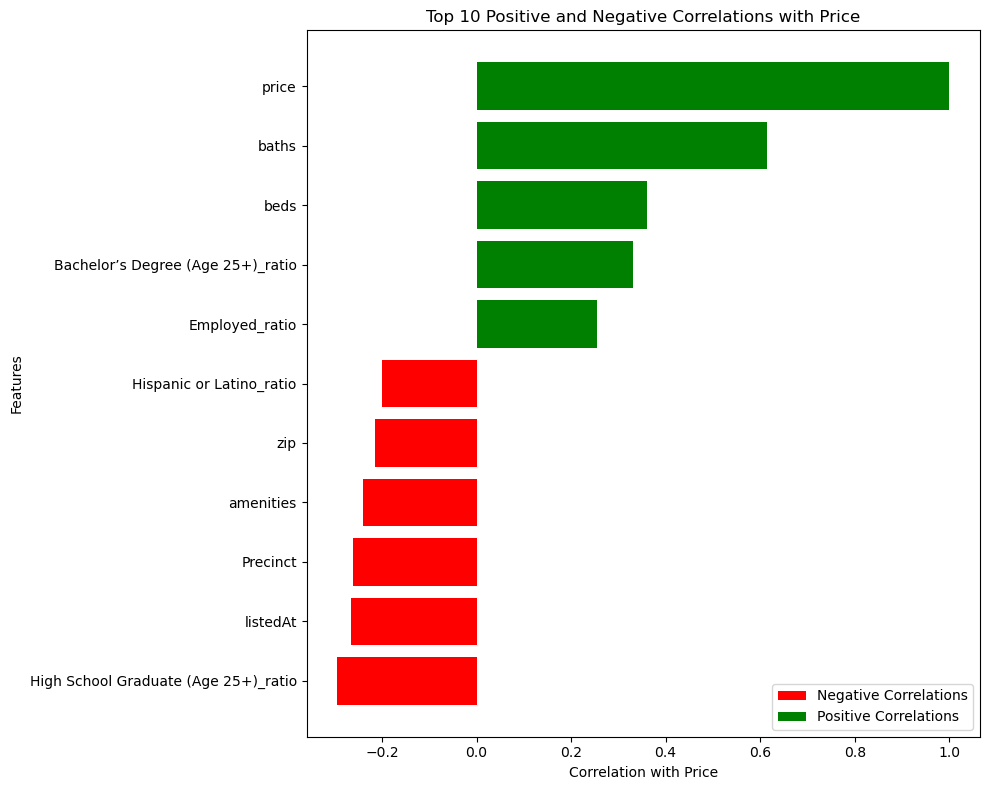

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Replace this with your actual DataFrame
# Example DataFrame placeholder (use your own data)
# housing_data = pd.read_csv('your_dataset.csv')

# Step 1: Separate numerical and categorical columns
numerical_columns = housing_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = housing_data.select_dtypes(include=['object']).columns

# Step 2: Preprocessing for numerical features
# Calculate correlation for numerical columns
numerical_corr = housing_data[numerical_columns].corr()['price'].sort_values(ascending=False)

# Step 3: Encode categorical columns
label_encoded_data = housing_data.copy()
label_encoder = LabelEncoder()

for col in categorical_columns:
    if col != 'price':  # Avoid encoding the target
        label_encoded_data[col] = label_encoder.fit_transform(label_encoded_data[col].astype(str))

# Step 4: Combine numerical and encoded categorical columns for correlation
encoded_corr = label_encoded_data.corr()['price'].sort_values(ascending=False)

# Step 5: Combine numerical and encoded categorical correlations using pd.concat
combined_corr = pd.concat([numerical_corr, encoded_corr]).sort_values()

# Step 6: Select top 10 positive and negative correlations
top_negative_corr = combined_corr.head(10)  # Smallest 10 values (most negative)
top_positive_corr = combined_corr.tail(10)  # Largest 10 values (most positive)

# Step 7: Create a visualization
plt.figure(figsize=(10, 8))

# Plot top negative correlations
plt.barh(top_negative_corr.index, top_negative_corr.values, color='red', label='Negative Correlations')

# Plot top positive correlations
plt.barh(top_positive_corr.index, top_positive_corr.values, color='green', label='Positive Correlations')

plt.xlabel('Correlation with Price')
plt.ylabel('Features')
plt.title('Top 10 Positive and Negative Correlations with Price')
plt.legend()
plt.tight_layout()
plt.show()


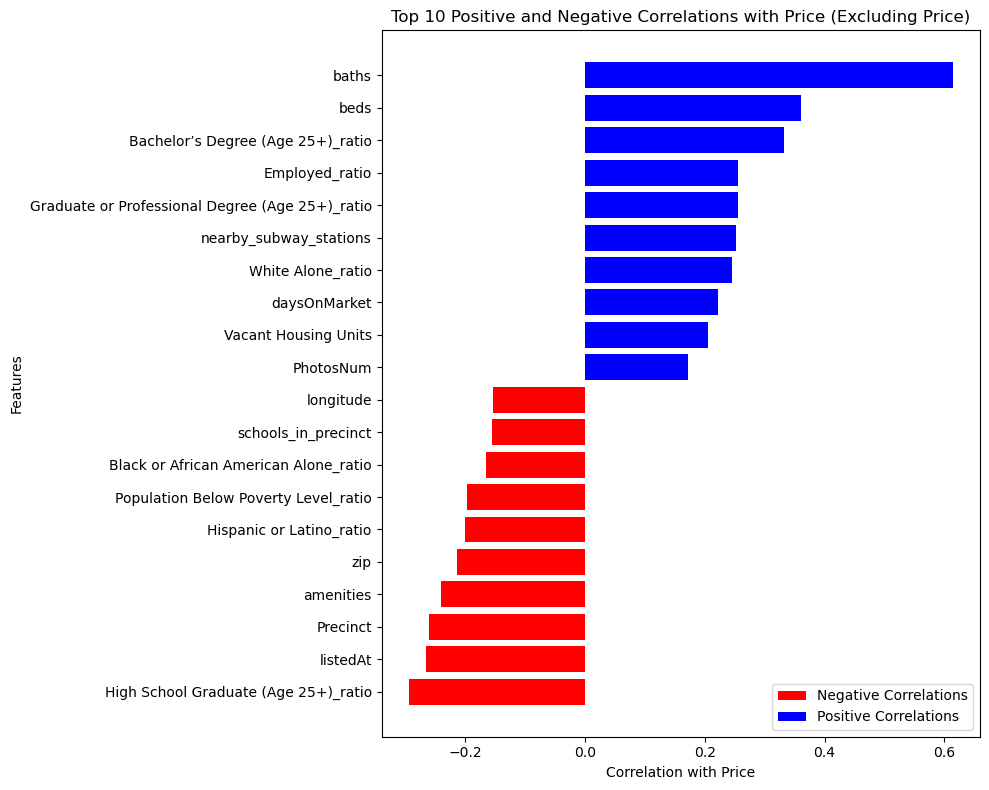

In [22]:
# Exclude 'price' from combined_corr
combined_corr = pd.concat([numerical_corr, encoded_corr]).drop('price').sort_values()

# Select top 10 positive and negative correlations
top_negative_corr = combined_corr.head(18)  # Smallest 10 values (most negative)
top_positive_corr = combined_corr.tail(20)  # Largest 10 values (most positive)

# Create the visualization
plt.figure(figsize=(10, 8))

# Plot top negative correlations
plt.barh(top_negative_corr.index, top_negative_corr.values, color='red', label='Negative Correlations')

# Plot top positive correlations
plt.barh(top_positive_corr.index, top_positive_corr.values, color='blue', label='Positive Correlations')

plt.xlabel('Correlation with Price')
plt.ylabel('Features')
plt.title('Top 10 Positive and Negative Correlations with Price (Excluding Price)')
plt.legend()
plt.tight_layout()
plt.show()


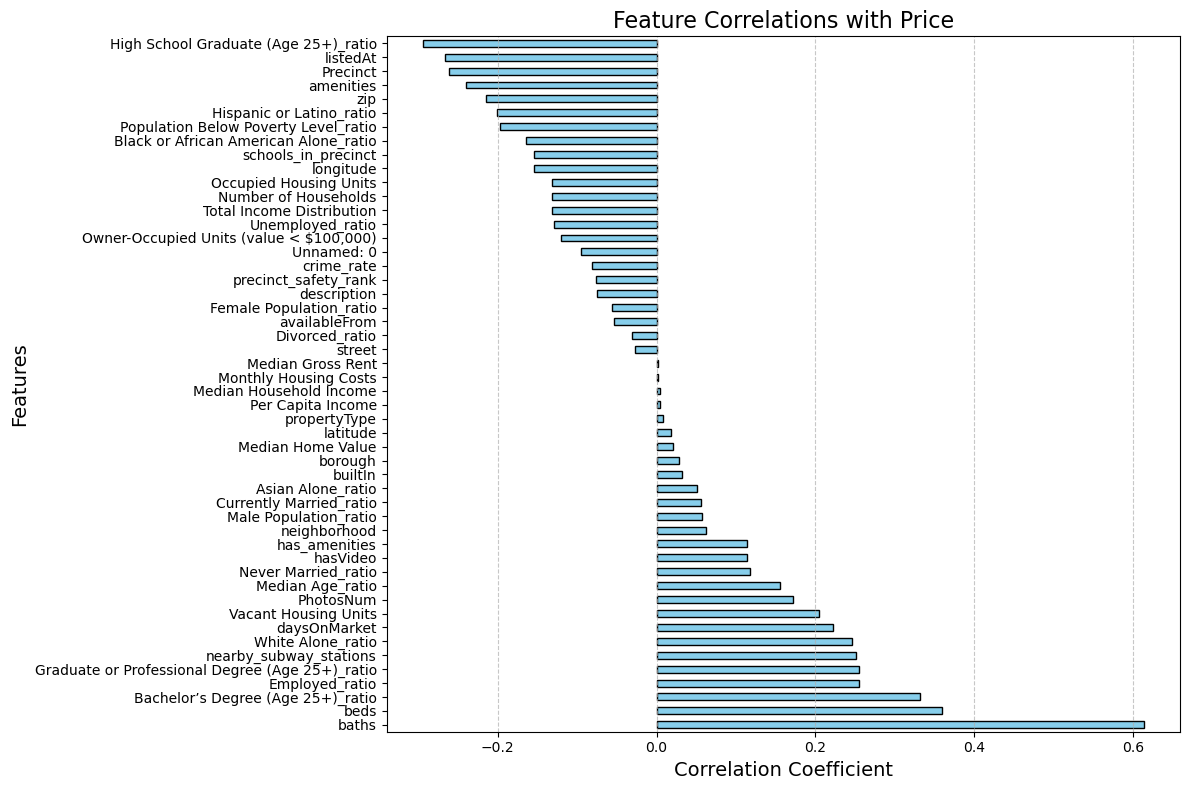

In [64]:
import matplotlib.pyplot as plt

# Combine numerical and encoded categorical correlations for visualization
all_corr = label_encoded_data.corr()['price'].sort_values(ascending=False)

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 8))
all_corr.drop('price').plot(kind='barh', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Feature Correlations with Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

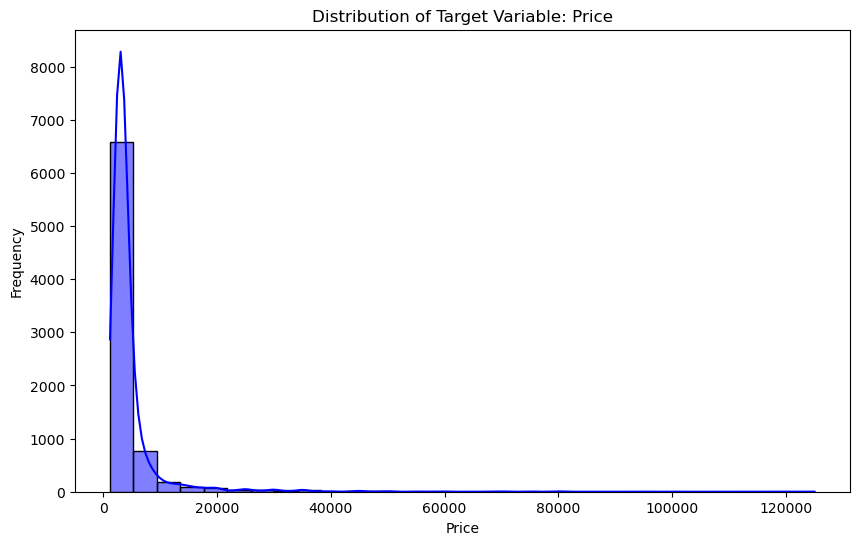

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'price' is the target variable in the dataset
# Replace 'housing_data' with the name of your DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(housing_data['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Target Variable: Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


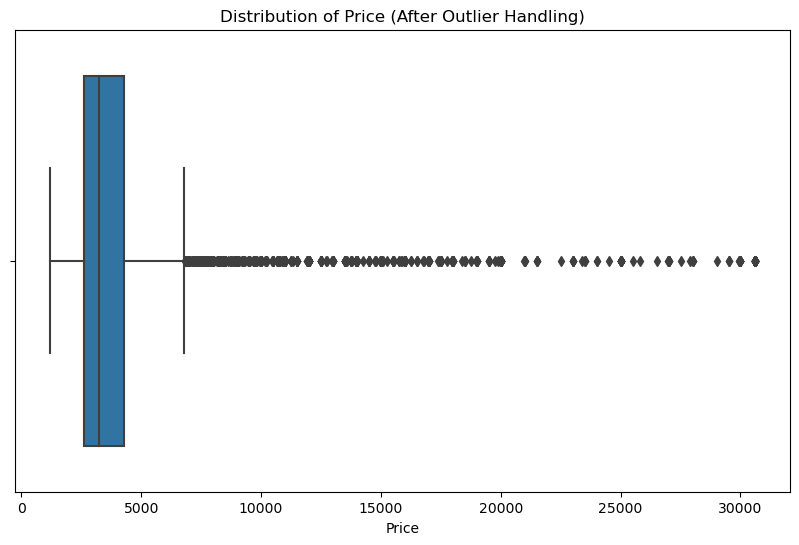

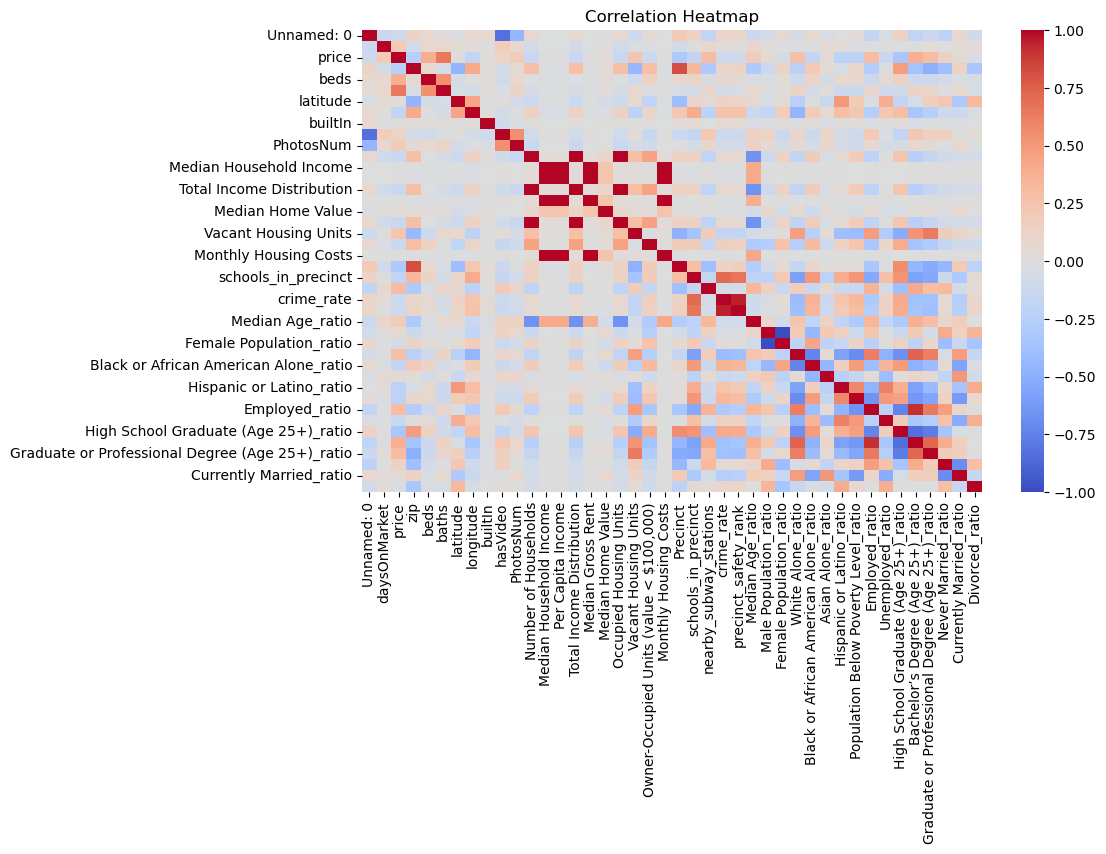

Top 10 features correlated with price:
price                                              1.000000
baths                                              0.651112
beds                                               0.390188
Bachelor’s Degree (Age 25+)_ratio                  0.378692
nearby_subway_stations                             0.301852
Employed_ratio                                     0.299659
Graduate or Professional Degree (Age 25+)_ratio    0.298887
White Alone_ratio                                  0.279272
Vacant Housing Units                               0.236543
daysOnMarket                                       0.209072
Name: price, dtype: float64


In [40]:
# Handle missing values
rental_data = df
# 1. Drop rows with missing critical target variable
rental_data = rental_data.dropna(subset=['price'])

# 2. Impute missing values for numerical features with median
numerical_cols = rental_data.select_dtypes(include=['float64', 'int64']).columns
rental_data[numerical_cols] = rental_data[numerical_cols].fillna(rental_data[numerical_cols].median())

# 3. Impute missing categorical features with placeholder
categorical_cols = rental_data.select_dtypes(include=['object']).columns
rental_data[categorical_cols] = rental_data[categorical_cols].fillna('Unknown')

# Handle outliers
# Cap 'price' and 'daysOnMarket' at the 1st and 99th percentiles
price_cap = rental_data['price'].quantile(0.99)
days_on_market_cap = rental_data['daysOnMarket'].quantile(0.99)

rental_data['price'] = np.where(rental_data['price'] > price_cap, price_cap, rental_data['price'])
rental_data['daysOnMarket'] = np.where(rental_data['daysOnMarket'] > days_on_market_cap, days_on_market_cap, rental_data['daysOnMarket'])

# Visualize the cleaned price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=rental_data['price'])
plt.title('Distribution of Price (After Outlier Handling)')
plt.xlabel('Price')
plt.show()

# Visualize correlations with price
correlations = rental_data.corr(numeric_only=True)['price'].sort_values(ascending=False)
top_10_features = correlations.head(10)

plt.figure(figsize=(10, 6))
sns.heatmap(rental_data.corr(numeric_only=True), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Encode categorical features for modeling
rental_data_encoded = pd.get_dummies(rental_data, columns=['borough', 'neighborhood'], drop_first=True)

# Save processed data for modeling
processed_file_path = 'processed_rental_data.csv'
rental_data_encoded.to_csv(processed_file_path, index=False)

# Output key insights
print("Top 10 features correlated with price:")
print(top_10_features)